In [6]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import warnings
import numpy as np

import argparse

mlp.rcParams["figure.facecolor"] = "white"
warnings.filterwarnings("ignore")

In [10]:
dataset_name = 'cifar100_60'
#input_path = f'/Users/chengjiaying/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
input_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/csv_3/{dataset_name}_csv.csv'
dataframe = pd.read_csv(input_path, index_col=0, on_bad_lines='skip')

qs_names = dataframe['qs'].unique()
print(qs_names.__class__)

<class 'numpy.ndarray'>


In [11]:
query_strategy_names = dataframe['qs'].unique()
print(query_strategy_names)

['RandomSampling' 'UncertaintySampling' 'DiscriminativeAL' 'CoreSet'
 'TypiClust' 'Badge']


In [12]:
result_score = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['score'].agg(['mean', 'std']).set_axis(['s_mean', 's_std'], axis=1)
result_time = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['time'].agg(['mean', 'std']).set_axis(['t_mean', 't_std'], axis=1)
typiclust = result_time.loc['TypiClust']
print(result_time)

                                                 t_mean      t_std
qs                  batch_size n_cycles step                      
Badge               16         60       0     93.029635  10.832394
                                        1     92.074368   9.643025
                                        2     92.488941  10.248805
                                        3     90.937063   8.817394
                                        4     92.689645  10.175777
...                                                 ...        ...
UncertaintySampling 16         60       55     3.881920   0.773965
                                        56     4.610153   2.397828
                                        57     3.861687   0.839123
                                        58     4.868707   1.629234
                                        59     5.269649   1.618511

[360 rows x 2 columns]


In [25]:
# input_path = f'/Users/chengjiaying/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
input_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/csv_3/{dataset_name}_csv.csv'
dataframe = pd.read_csv(input_path, index_col=0, on_bad_lines='skip')
dataframe = dataframe.dropna()

query_strategy_names = dataframe['qs'].unique()

result_time = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['time'].agg(['mean', 'std']).set_axis(
    ['t_mean', 't_std'], axis=1)
b = result_time.loc['Badge']
qs_result_t_mean = b['t_mean'].to_numpy()
print(qs_result_t_mean)

[ 93.0296351   92.07436848  92.48894062  90.93706288  92.68964515
 111.01219616 110.09909868 127.10613117 122.72777891 121.25429907
 122.50933237 122.66724439 109.80446053 116.80146675 103.27437735
 114.17531619 112.58964834 108.70074582 123.35617847 102.29315062
 118.54890752 101.65317807 119.37372351 119.84578385 109.19326339
 122.17375598 107.54969239 116.44272981 105.11763678  96.57135258
  94.5400537   94.77922592  95.35384927  97.28633976  95.70563002
  95.48813963  94.53741217  96.42974505  94.09000773  95.1825058
  94.50327096  95.70507998  96.0435225   95.90546083  94.54658294
  95.20209923  95.52702575  96.12120228  95.23959141  96.77975354
  95.90000353  96.6289187   94.23391409  94.81082034  93.78874903
  95.84390106  96.6461904   95.43744135 110.2095077  103.89951968]


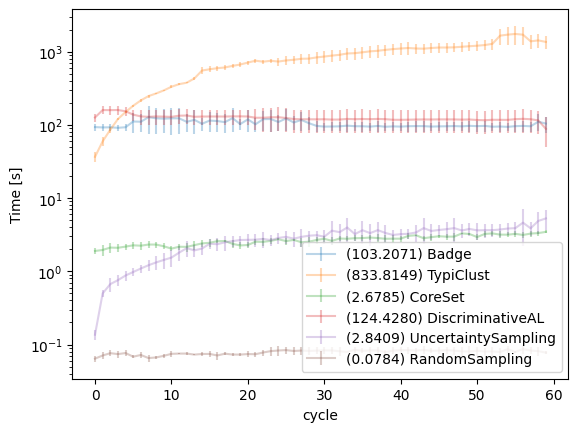

In [30]:
query_strategy_names = np.flip(query_strategy_names)
for qs_name in query_strategy_names:
    qs_result_t = result_time.loc[qs_name]
    qs_result_t_mean = qs_result_t['t_mean'].to_numpy()
    qs_result_t_std = qs_result_t['t_std'].to_numpy()

    plt.errorbar(np.arange(len(qs_result_t_mean)), qs_result_t_mean, qs_result_t_std,
                 label=f"({np.mean(qs_result_t_mean):.4f}) {qs_name}", alpha=0.3)

plt.legend(loc='lower right')
plt.xlabel('cycle')
plt.yscale("log")
plt.ylabel("Time [s]")
# output_path = f'{dataset_name}_time.png'
output_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/result/{dataset_name}_time.pdf'
plt.savefig(output_path)